In [1]:
import os
import numpy as np
import pandas as pd

from scipy.signal import butter, filtfilt
from scipy import stats
from scipy.interpolate import interp1d

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
from tabulate import tabulate

path = './data/disi_set3/'
acc = 'Accelerometer.csv'
gyr = 'Gyroscope.csv'
mag = 'Magnetometer.csv'
lin = 'Linear Acceleration.csv' 

data = dict()
data[acc] = pd.read_csv(path + acc)
data[gyr] = pd.read_csv(path + gyr)	
data[mag] = pd.read_csv(path + mag)
data[lin] = pd.read_csv(path + lin)

rows = []
for key in data:
    res = [col for col in data[key]]
    rows.append(res)
    
    

formatted_string = tabulate(rows, tablefmt="plain")
print(formatted_string)

Time (s)  Acceleration x (m/s^2)         Acceleration y (m/s^2)         Acceleration z (m/s^2)
Time (s)  Gyroscope x (rad/s)            Gyroscope y (rad/s)            Gyroscope z (rad/s)
Time (s)  Magnetic field x (µT)          Magnetic field y (µT)          Magnetic field z (µT)
Time (s)  Linear Acceleration x (m/s^2)  Linear Acceleration y (m/s^2)  Linear Acceleration z (m/s^2)


# Plotten 

In [ ]:
fig = go.Figure()

#acc: Time (s);"X (m/s^2)";"Y (m/s^2)";"Z (m/s^2)"
#gyro Time (s);"X (rad/s)";"Y (rad/s)";"Z (rad/s)"
#mag: Time (s);"X (µT)";"Y (µT)";"Z (µT)"
#Linear Acceleration: Time (s);"X (m/s^2)";"Y (m/s^2)";"Z (m/s^2)"

# Accelerometer-Daten
fig.add_trace(go.Scatter(x=data[acc]['Time (s)'], y=data[acc]["Acceleration x (m/s^2)"], name='Accel X'))
fig.add_trace(go.Scatter(x=data[acc]['Time (s)'], y=data[acc]["Acceleration y (m/s^2)"], name='Accel Y'))
fig.add_trace(go.Scatter(x=data[acc]['Time (s)'], y=data[acc]["Acceleration z (m/s^2)"], name='Accel Z'))


# # Gyroscope-Daten
# fig.add_trace(go.Scatter(x=gyr_df['Time (s)'], y=gyr_df['X (rad/s)'], name='Gyro X'))
# fig.add_trace(go.Scatter(x=gyr_df['Time (s)'], y=gyr_df['Y (rad/s)'], name='Gyro Y'))
# fig.add_trace(go.Scatter(x=gyr_df['Time (s)'], y=gyr_df['Z (rad/s)'], name='Gyro Z'))

# # Magnetometer-Daten
# fig.add_trace(go.Scatter(x=mag_df['Time (s)'], y=mag_df['X (µT)'], name='Magno X'))
# fig.add_trace(go.Scatter(x=mag_df['Time (s)'], y=mag_df['Y (µT)'], name='Magno Y'))
# fig.add_trace(go.Scatter(x=mag_df['Time (s)'], y=mag_df['Z (µT)'], name='Magno Z'))

# Aktualisiere Layout und Labels
fig.update_layout(title='Sensor-Daten Visualisierung',
                  xaxis_title='Zeit (s)',
                  yaxis_title='Wert',
                  legend_title='Achse')
fig.show()


In [ ]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Accelerometer', 'Gyroscope', 'Magnetometer'), vertical_spacing=0.1, row_heights=[3, 3, 3])

# Subplot 1: Accelerometer-Daten
fig.add_trace(go.Scatter(x=acc_df['Time (s)'], y=acc_df['Linear Acceleration x (m/s^2)'], mode='lines+markers', marker=dict(size=4), name='X'), row=1, col=1)
fig.add_trace(go.Scatter(x=acc_df['Time (s)'], y=acc_df['Linear Acceleration y (m/s^2)'], mode='lines+markers', marker=dict(size=4), name='Y'), row=1, col=1)
fig.add_trace(go.Scatter(x=acc_df['Time (s)'], y=acc_df['Linear Acceleration z (m/s^2)'], mode='lines+markers', marker=dict(size=4), name='Z'), row=1, col=1)

# Subplot 2: Gyroscope-Daten
fig.add_trace(go.Scatter(x=gyr_df['Time (s)'], y=gyr_df['Gyroscope x (rad/s)'], mode='lines+markers', marker=dict(size=4), name='X'), row=2, col=1)
fig.add_trace(go.Scatter(x=gyr_df['Time (s)'], y=gyr_df['Gyroscope y (rad/s)'], mode='lines+markers', marker=dict(size=4), name='Y'), row=2, col=1)
fig.add_trace(go.Scatter(x=gyr_df['Time (s)'], y=gyr_df['Gyroscope z (rad/s)'], mode='lines+markers', marker=dict(size=4), name='Z'), row=2, col=1)

# Subplot 3: Magnetometer-Daten
fig.add_trace(go.Scatter(x=mag_df['Time (s)'], y=mag_df['Magnetic field x (µT)'], mode='lines+markers', marker=dict(size=4), name='X'), row=3, col=1)
fig.add_trace(go.Scatter(x=mag_df['Time (s)'], y=mag_df['Magnetic field y (µT)'], mode='lines+markers', marker=dict(size=4), name='Y'), row=3, col=1)
fig.add_trace(go.Scatter(x=mag_df['Time (s)'], y=mag_df['Magnetic field z (µT)'], mode='lines+markers', marker=dict(size=4), name='Z'), row=3, col=1)

# Aktualisiere Layout und Labels
fig.update_layout(title='Sensor-Daten Visualisierung',
                  xaxis_title='Zeit (s)',
                  yaxis_title='Wert',
                  legend_title='Achse',
                  height=800, width=1000)
fig.show()


# Weitere Vorverarbeitungsschritte 

In [ ]:
# Betrag oder Magnitude der Beschleunigung als Gesamtbeschleunigung aus den drei Achsen berechnen
acc_df['acc.mag'] = np.sqrt(acc_df['Linear Acceleration x (m/s^2)']**2 + acc_df['Linear Acceleration y (m/s^2)']**2 + acc_df['Linear Acceleration z (m/s^2)']**2)

# Unnötige Spalten löschen und nur mit Magnitude weiterrechnen 
acc_df = acc_df.drop(['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)'], axis = 1)

acc_df.head()

,Time (s),acc.mag
0,0.102754,1.443070
1,0.107767,1.420603
2,0.112780,1.428368
3,0.117792,1.438688
4,0.122805,1.454631


In [ ]:
# Nur mit der Y-Achse vom Gyroscope weiterarbeiten 
# dataframevalue.loc[rows,columns]
gyr_df = gyr_df.loc[:,['Time (s)',	'Gyroscope y (rad/s)']]
gyr_df.rename(columns={'Gyroscope y (rad/s)': 'gyr.y'}, inplace=True)

gyr_df.head()

,Time (s),gyr.y
0,0.102754,0.713075
1,0.107767,0.717337
2,0.112780,0.723662
3,0.117792,0.732188
4,0.122805,0.737550


In [ ]:
# Nur mit der Z-Achse vom Magnometer weiterarbeiten
mag_df = mag_df.loc[:,['Time (s)',	'Magnetic field z (µT)']]
mag_df.rename(columns={'Magnetic field z (µT)': 'mag.z'}, inplace=True)

mag_df.head()

,Time (s),mag.z
0,0.043742,42.243752
1,0.063731,-15.000001
2,0.083751,-15.112500
3,0.103603,-15.000001
4,0.123497,-15.412500


# Datensets zusammenführen

In [ ]:
# Wir nutzen die Accelerometer-Daten als Grundlage 
# Resampling der Magnometer-Daten (50 Hz auf 200 Hz) und gleichzeitig die zeitliche Ausrichtung anpassen 
# np.interp(newTime(x), originalTime(x), sampleValues(y))
resampled_magnetometer_data = np.interp(acc_df['Time (s)'], mag_df['Time (s)'], mag_df['mag.z'])

print(resampled_magnetometer_data)


[-15.0048102  -15.08633978 -15.19027533 ...  42.48750305  42.48750305
  42.48750305]


In [ ]:
# Daten zur Visualisierung des Ergebnisses plotten 
fig = go.Figure()

# Accelerometer-Daten
fig.add_trace(go.Scatter(x=acc_df['Time (s)'], y=acc_df['acc.mag'], name='Acc', mode='lines+markers', marker=dict(size=4)))

# Gyroscope-Daten
fig.add_trace(go.Scatter(x=gyr_df['Time (s)'], y=gyr_df['gyr.y'], name='Gyr', mode='lines+markers', marker=dict(size=4),))

# Magnetometer-Daten
# Die ursprünglichen Daten um 0.3 versetzt plotten, damit sie deutlich zu erkennen sind 
fig.add_trace(go.Scatter(x=mag_df['Time (s)'], y=mag_df['mag.z']+0.3, name='Mag', mode='lines+markers', marker=dict(size=4),))
# Die neuen Daten plotten 
fig.add_trace(go.Scatter(x=acc_df['Time (s)'], y=resampled_magnetometer_data, name='Mag_rs', mode='lines+markers', marker=dict(size=4),))

# Aktualisiere Layout und Labels
fig.update_layout(title='Sensor-Daten Visualisierung',
                  xaxis_title='Zeit (s)',
                  yaxis_title='Wert',
                  legend_title='Achse')
fig.show()


In [ ]:
# Zusammenfügen zu einem Datenset: zuerst Accelerometer und Gyroscpe
df = acc_df.merge(gyr_df, on='Time (s)') #.merge(df3, on='Time')
# df2 = acc_df.merge(gyr_df, on='Time (s)')
# acc_df.merge(gyr_df, on='Time (s)')
# Dann die neuen Magnometer Daten  hinzufügen 
# warum nicht beim merge einbeziehen?
print("resampled mag data", (type(resampled_magnetometer_data)))
print("gyr_df", type(gyr_df))
df['mag.z'] = resampled_magnetometer_data
df.head()
#df.shape
#len(resampled_magnetometer_data)

resampled mag data <class 'numpy.ndarray'>
gyr_df <class 'pandas.core.frame.DataFrame'>


,Time (s),acc.mag,gyr.y,mag.z
0,0.102754,1.443070,0.713075,-15.004810
1,0.107767,1.420603,0.717337,-15.086340
2,0.112780,1.428368,0.723662,-15.190275
3,0.117792,1.438688,0.732188,-15.294211
4,0.122805,1.454631,0.737550,-15.398146


# Frequenzfilter

In [ ]:
filtered_dataframe = df.copy()

# Define the cutoff frequency and filter order
filter_order = 4  # Adjust as needed

low_cutoff = 0.2 # Adjust as needed
high_cutoff = 10 # Adjust as needed

# Design a Butterworth band-pass filter
b, a = butter(filter_order, [low_cutoff, high_cutoff], btype='band', analog=False, fs =200)

# Acceleration und Gyroscope mit definiertem Filter filtern 
filtered_dataframe['acc.mag'] = filtfilt(b, a, df['acc.mag'])
filtered_dataframe['gyr.y'] = filtfilt(b, a, df['gyr.y'])

# Magnometer mit Moving Average Filter filtern  
filtered_dataframe['mag.z'] = df['mag.z'].rolling(window=50).mean()
filtered_dataframe['mag.z'][0:49] = df['mag.z'][0:49] #1#df['mag.z']

# Plot zum Vergleich ursprüngliche mit gefilterten Daten 

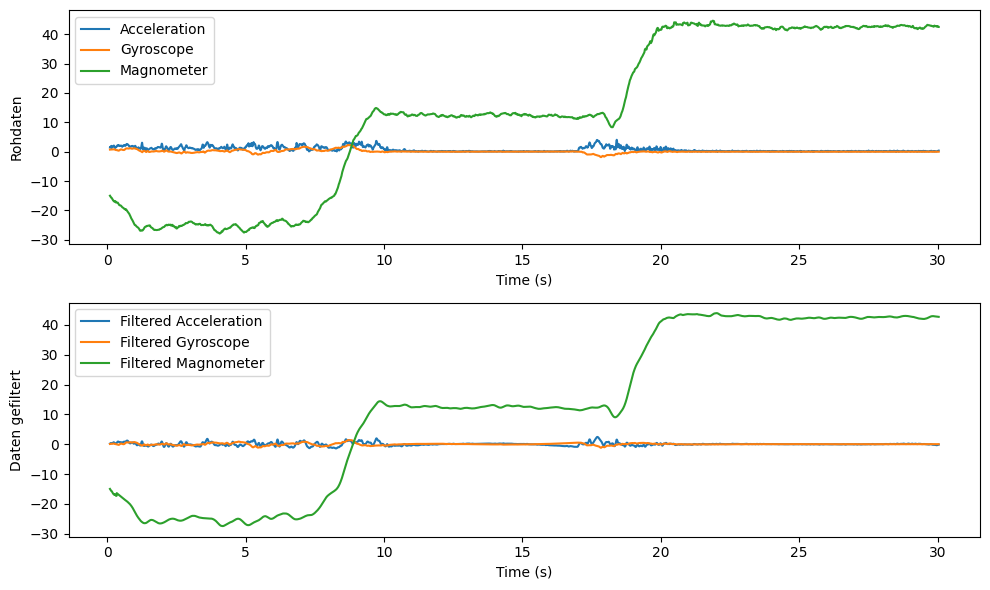

In [ ]:
# Extrahieren der Zeitstempel und Spalten für das Plotten
time = df['Time (s)']
accel = df['acc.mag']
gyro_y = df['gyr.y']
magno_z = df['mag.z']

time_filtered = filtered_dataframe['Time (s)']
filtered_acc = filtered_dataframe['acc.mag']
filtered_gyro_Y = filtered_dataframe['gyr.y']
filtered_magno_Z = filtered_dataframe['mag.z']

# Plotten der Daten
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, accel, label='Acceleration')
plt.plot(time, gyro_y, label='Gyroscope')
plt.plot(time, magno_z, label='Magnometer')
plt.xlabel('Time (s)')
plt.ylabel('Rohdaten')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(time_filtered, filtered_acc, label='Filtered Acceleration')
plt.plot(time_filtered, filtered_gyro_Y, label='Filtered Gyroscope')
plt.plot(time_filtered, filtered_magno_Z, label='Filtered Magnometer')
plt.xlabel('Time (s)')
plt.ylabel('Daten gefiltert')
plt.legend()

plt.tight_layout()
plt.show()

# Ausreißer Bereinigen und Z-Score normalisieren 

In [ ]:
# Berechnung der Z-Scores für jede Spalte
filtered_dataframe2 = filtered_dataframe.copy()
filtered_dataframe2['Z_Score_Acc'] = stats.zscore(filtered_dataframe['acc.mag'])
filtered_dataframe2['Z_Score_Gyr'] = stats.zscore(filtered_dataframe['gyr.y'])
filtered_dataframe2['Z_Score_Mag'] = stats.zscore(filtered_dataframe['mag.z'])
print(filtered_dataframe2.head())

# Festlegen eines Schwellenwerts für Z-Scores, ab dem ein Punkt als Ausreißer betrachtet wird

# z-Score von 2.5 ist optimal: Bei 2.7  vermischen sich gehen und Sitzen zu sehr
# ab 2.4 sind viele Gehen-Punkte fälschlicherweise im Sitzen-Cluster
z_score_threshold = 2.5  # Bei Bedarf anpassen

# Filtern der Ausreißer aus dem dataframeFrame (nur wenn alle drei Achsen unterhalb des THreshold liegen sind Daten ok)
filtered_dataframe2 = filtered_dataframe2[(abs(filtered_dataframe2['Z_Score_Acc']) <= z_score_threshold) &
                     (abs(filtered_dataframe2['Z_Score_Gyr']) <= z_score_threshold) &
                     (abs(filtered_dataframe2['Z_Score_Mag']) <= z_score_threshold)]

#print(filtered_dataframe2.head())

# Jetzt enthält 'filtered_dataframe' nur noch die Datenpunkte, die nicht als Ausreißer betrachtet werden.
print(df.shape)
print(filtered_dataframe2.shape)


   Time (s)   acc.mag     gyr.y      mag.z  Z_Score_Acc  Z_Score_Gyr  \
0  0.102754  0.181446  0.075115 -15.004810     0.350272     0.222748   
1  0.107767  0.228092  0.081285 -15.086340     0.445127     0.241767   
2  0.112780  0.271974  0.087409 -15.190275     0.534362     0.260644   
3  0.117792  0.310763  0.093431 -15.294211     0.613239     0.279207   
4  0.122805  0.342419  0.099300 -15.398146     0.677613     0.297296   

   Z_Score_Mag  
0    -1.056844  
1    -1.059939  
2    -1.063885  
3    -1.067830  
4    -1.071776  
(5973, 4)
(5639, 7)


# Plot zum Vergleich ursprüngliche mit gefilterten Daten 

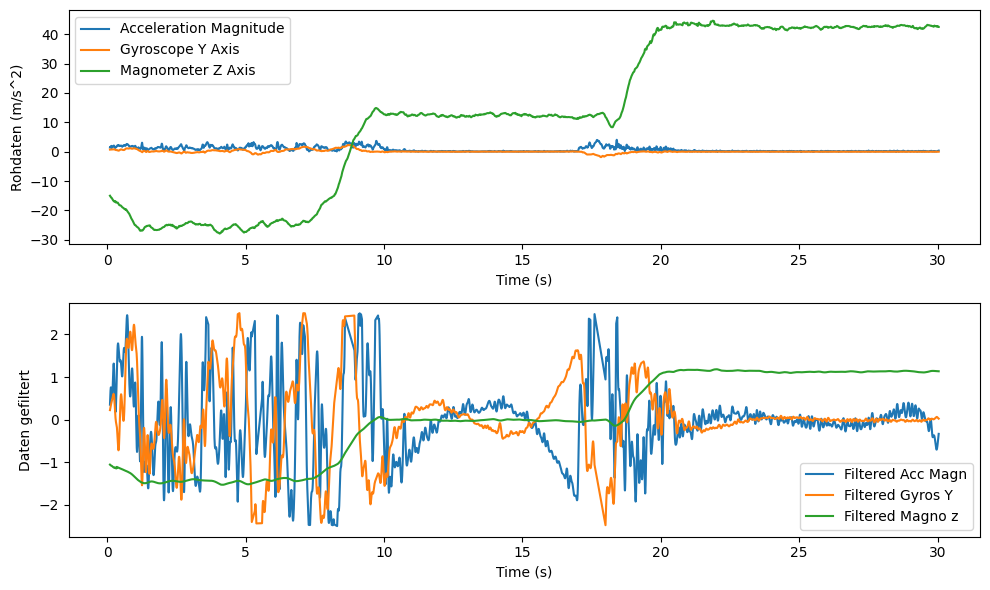

In [ ]:
# Extrahieren der Zeitstempel und Spalten für das Plotten
time = df['Time (s)']
accel = df['acc.mag']
gyro_y = df['gyr.y']
magno_z = df['mag.z']

time_filtered = filtered_dataframe2['Time (s)']
filtered_accel = filtered_dataframe2['Z_Score_Acc']
filtered_gyro_y = filtered_dataframe2['Z_Score_Gyr']
filtered_magno_z = filtered_dataframe2['Z_Score_Mag']

#filtered_accel = filtered_dataframe2['acc.mag']
#filtered_gyro_y = filtered_dataframe2['gyr.y']
#filtered_magno_z = filtered_dataframe2['mag.z']

# Plotten der Daten
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, accel, label='Acceleration Magnitude')
plt.plot(time, gyro_y, label='Gyroscope Y Axis')
plt.plot(time, magno_z, label='Magnometer Z Axis')
plt.xlabel('Time (s)')
plt.ylabel('Rohdaten (m/s^2)')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(time_filtered, filtered_accel, label='Filtered Acc Magn')
plt.plot(time_filtered, filtered_gyro_y, label='Filtered Gyros Y')
plt.plot(time_filtered, filtered_magno_z, label='Filtered Magno z')
plt.xlabel('Time (s)')
plt.ylabel('Daten gefiltert')
plt.legend()

plt.tight_layout()
plt.show()

# Windowing

In [ ]:
# window-size von 200 hatte keinen nennenswerten Effekt,
# ebenso overlaps zwischen 0-50. Oberhalb von 50 
# werden die Datenpunkte zu homogen 

window_size = 100 #Bei Bedarf anpassen
overlap = 50 #Bei Bedarf anpassen

#Liste initiieren für Fenster
windows = []

#Für jedes Fenster in den Daten neuen Dataframe erstellen, der in Liste abgelegt wird 
for i in range(0, len(filtered_dataframe2), window_size - overlap):
    window = filtered_dataframe2.iloc[i:i+window_size]
    windows.append(window)

#Ersten Dataframe in der Liste ausgeben lassen 
print(windows[0].head())
#Anzahl Datenpunkte des ersten Dataframes ausgeben lassen 
print(len(windows[0]))
#Spalten des ersten Dataframes ausgeben lassen 
#print(windows[0].columns)

#Ausgeben lassen wie viele Dataframes also Fenster entstanden sind 
print (len(windows))


   Time (s)   acc.mag     gyr.y      mag.z  Z_Score_Acc  Z_Score_Gyr  \
0  0.102754  0.181446  0.075115 -15.004810     0.350272     0.222748   
1  0.107767  0.228092  0.081285 -15.086340     0.445127     0.241767   
2  0.112780  0.271974  0.087409 -15.190275     0.534362     0.260644   
3  0.117792  0.310763  0.093431 -15.294211     0.613239     0.279207   
4  0.122805  0.342419  0.099300 -15.398146     0.677613     0.297296   

   Z_Score_Mag  
0    -1.056844  
1    -1.059939  
2    -1.063885  
3    -1.067830  
4    -1.071776  
100
113


# Features erstellen 

In [ ]:
#Leere Liste erstellen, um Features zu speichern 
feature_list = []

#Jeden Dataframe in Windos einzeln durchgehen und für jede der drei Achsen die Features berechnen 
for window in windows:
    data = window[['Z_Score_Acc',  'Z_Score_Gyr',  'Z_Score_Mag']]
    #Mittelwert
    data_mean = data.mean()
    #Standardabweichung
    data_std_dev = data.std()
    #Minimum
    data_min = data.min()
    #Maximum
    data_max = data.max()
    
    #Berechnete Werte an Liste anhängen, unter entsprechend benannten Spalten 
    feature_list.append({
        'Beschleunigung_Mittelwert': data_mean[0],
        'Gyroscope_Mittelwert': data_mean[1],
        'Magnometer_Mittelwert': data_mean[2],
        'Beschleunigung_Standardabweichung': data_std_dev[0],
        'Gyroscope_Standardabweichung': data_std_dev[1],
        'Magnometer_Standardabweichung': data_std_dev[2],
        'Beschleunigung_Minimum': data_min[0],
        'Gyroscope_Minimum': data_min[1],
        'Magnometer_Minimum': data_min[2],
        'Beschleunigung_Maximum': data_max[0],
        'Gyroscope_Maximum': data_max[1],
        'Magnometer_Maximum': data_max[2]
    })
###########################
####### median & var ########
##########################
# hat die Cluster des K-means Algorithmus kaum beinflusst
    # feature_list.append({
    #     'Beschleunigung_Mittelwert': data_median[0],
    #     'Gyroscope_Median': data_median[1],
    #     'Magnometer_Mittelwert': data_median[2],
    #     'Beschleunigung_Standardabweichung': data_var[0],
    #     'Gyroscope_Standardabweichung': data_var[1],
    #     'Magnometer_Standardabweichung': data_var[2],
    #     'Beschleunigung_Minimum': data_min[0],
    #     'Gyroscope_Minimum': data_min[1],
    #     'Magnometer_Minimum': data_min[2],
    #     'Beschleunigung_Maximum': data_max[0],
    #     'Gyroscope_Maximum': data_max[1],
    #     'Magnometer_Maximum': data_max[2]
    # })

#In einen Pandas Dataframe konvertieren und ausgeben
feature_df = pd.DataFrame(feature_list)

print(feature_df.head())

#Dimensionen der Feautures ausgeben lassen 
feature_df.shape


   Beschleunigung_Mittelwert  Gyroscope_Mittelwert  Magnometer_Mittelwert  \
0                   1.046786              0.141284              -1.128499   
1                   1.502627              0.728082              -1.183649   
2                   1.033266              1.642716              -1.277670   
3                   0.215999              0.649508              -1.399364   
4                  -0.515659             -0.675676              -1.468238   

   Beschleunigung_Standardabweichung  Gyroscope_Standardabweichung  \
0                           0.447256                      0.390760   
1                           0.470462                      0.933915   
2                           0.837138                      0.504038   
3                           0.842342                      1.257387   
4                           0.888625                      0.541790   

   Magnometer_Standardabweichung  Beschleunigung_Minimum  Gyroscope_Minimum  \
0                       0.029843     

(113, 12)

# Ausblick: Clustering der Features erstellen 

In [ ]:
from sklearn.cluster import KMeans

# Anzahl der gewünschten Cluster festlegen 
anzahl_cluster = 3  # Passe dies an deine Anforderungen an.

# Initialisierung des K-Means-Cluster-Algorithmus
kmeans = KMeans(n_clusters=anzahl_cluster, random_state=0)

# Clustering auf den Daten in 'feature_df' durchführen
cluster_labels = kmeans.fit_predict(feature_df)

# Berechnete Cluster zu jedem der Datenpunkte im Feature Dataframe zuordnungen
feature_df['Cluster'] = cluster_labels

# Gib das aktualisierte DataFrame mit Clusterzuordnungen aus.
#print(feature_df.head())
feature_df.columns


C:\Users\alexh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Index(['Beschleunigung_Mittelwert', 'Gyroscope_Mittelwert',
       'Magnometer_Mittelwert', 'Beschleunigung_Standardabweichung',
       'Gyroscope_Standardabweichung', 'Magnometer_Standardabweichung',
       'Beschleunigung_Minimum', 'Gyroscope_Minimum', 'Magnometer_Minimum',
       'Beschleunigung_Maximum', 'Gyroscope_Maximum', 'Magnometer_Maximum',
       'Cluster'],
      dtype='object')

0 b
1 g
2 r


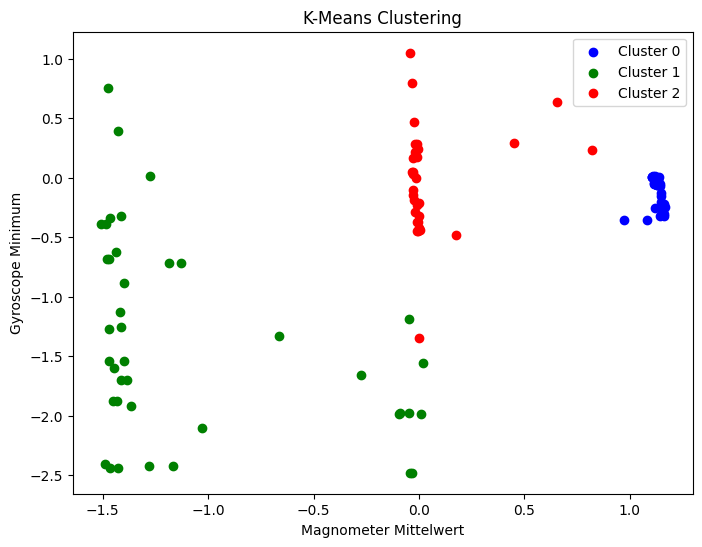

In [ ]:
# Visualisierung der Cluster
plt.figure(figsize=(8, 6))

# Erstelle eine Liste von Farben für die Cluster
farben = ['b', 'g', 'r']

# Durchlaufen der Cluster und erstellen der Scatter-Plots für jeden Cluster
for cluster_id in range(anzahl_cluster):
    print(cluster_id, farben[cluster_id])
    cluster_data = feature_df[feature_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Magnometer_Mittelwert'], cluster_data['Gyroscope_Minimum'], c=farben[cluster_id], label=f'Cluster {cluster_id}')
    #plt.scatter(cluster_data['Magnometer_Minimum'], cluster_data['Beschleunigung_Standardabweichung'], c=farben[cluster_id], label=f'Cluster {cluster_id}')

# Beschriftung des Diagramms
plt.xlabel('Magnometer Mittelwert')
plt.ylabel('Gyroscope Minimum')
plt.title('K-Means Clustering')
plt.legend()

# Anzeigen des Scatter-Plots
plt.show()


In [ ]:
# Nun wollen wir die Daten mit den echten Bewegungen vergleichen
# Dazu Daten zunächst mit den Labeln versehen, was für Aktivität in der Zeit ausgeführt wurde

for i in range(len(windows)):
    if i < 38: # erstes Drittel der Zeit wurde gegangen
        label = "Gehen"
    elif i < 76: # zweites Drittel der Zeit wurde gesessen
        label = "Sitzen"
    else: # letztes Drittel der Zeit wurde gelegen
        label = "Liegen"
    
    # Füge das entsprechene Label hinzu
    feature_df.loc[i, 'Label'] = label


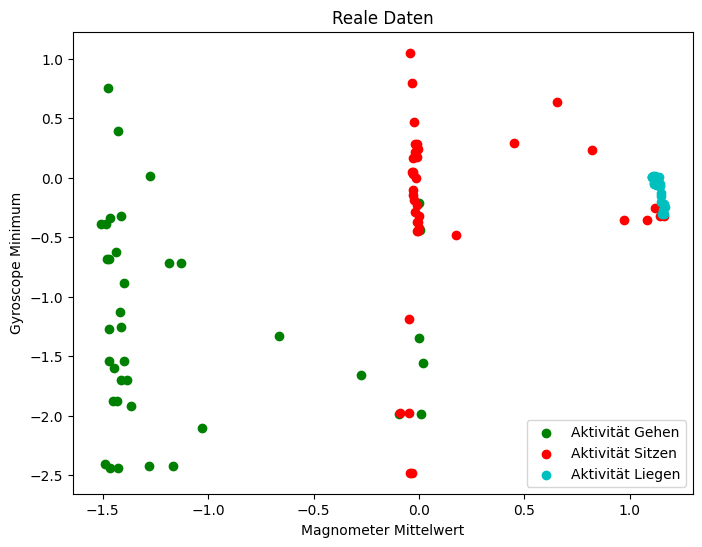

In [ ]:
# Nun können wir die Datenpunkte entsprechend nach der tatsächlich ausgeführten Aktivität einfärben 

# Visualisierung der Cluster
plt.figure(figsize=(8, 6))

# Erstelle eine Liste von Farben für die Cluster
farben = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Durchlaufen der Cluster und erstellen der Scatter-Plots für jeden Cluster
i=1
for label in ['Gehen','Sitzen','Liegen']:
    cluster_data = feature_df[feature_df['Label'] == label]
    plt.scatter(cluster_data['Magnometer_Mittelwert'], cluster_data['Gyroscope_Minimum'], c=farben[i], label=f'Aktivität {label}')
    i+=1

# Beschriftung des Diagramms
plt.xlabel('Magnometer Mittelwert')
plt.ylabel('Gyroscope Minimum')
plt.title('Reale Daten')
plt.legend()

# Anzeigen des Scatter-Plots
plt.show()


Genauigkeit des Entscheidungsbaum-Classifiers: 0.8823529411764706


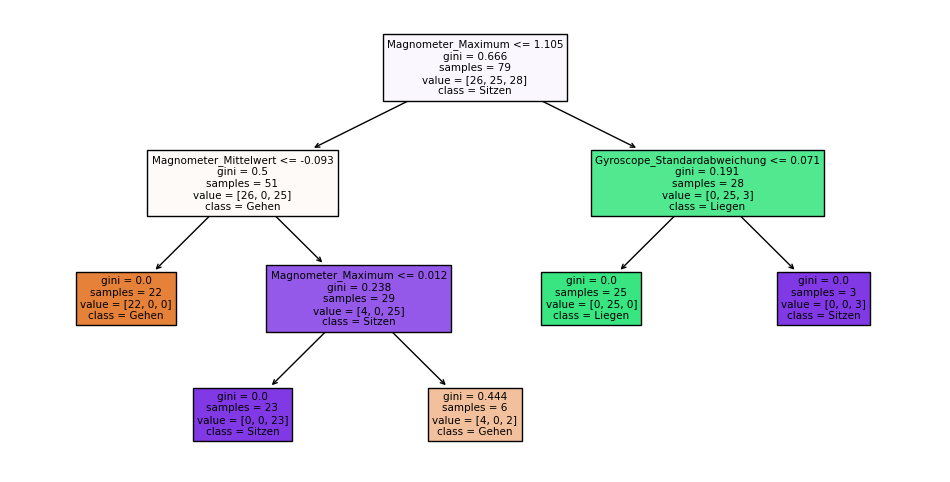

|--- Magnometer_Maximum <= 1.11
|   |--- Magnometer_Mittelwert <= -0.09
|   |   |--- class: Gehen
|   |--- Magnometer_Mittelwert >  -0.09
|   |   |--- Magnometer_Maximum <= 0.01
|   |   |   |--- class: Sitzen
|   |   |--- Magnometer_Maximum >  0.01
|   |   |   |--- class: Gehen
|--- Magnometer_Maximum >  1.11
|   |--- Gyroscope_Standardabweichung <= 0.07
|   |   |--- class: Liegen
|   |--- Gyroscope_Standardabweichung >  0.07
|   |   |--- class: Sitzen



In [ ]:
# Teile die Daten in Trainings- und Testsets auf
X = feature_df.drop(columns=['Label'])
y = feature_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Erstelle und trainiere den Entscheidungsbaum-Classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Mache Vorhersagen auf dem Testset
y_pred = clf.predict(X_test)

# Berechne die Genauigkeit des Classifiers
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des Entscheidungsbaum-Classifiers: {accuracy}")

# Visualisiere den Entscheidungsbaum
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

# Visualisiere den Entscheidungsbaum in Textform
tree_text = export_text(clf, feature_names=X.columns.tolist())
print(tree_text)

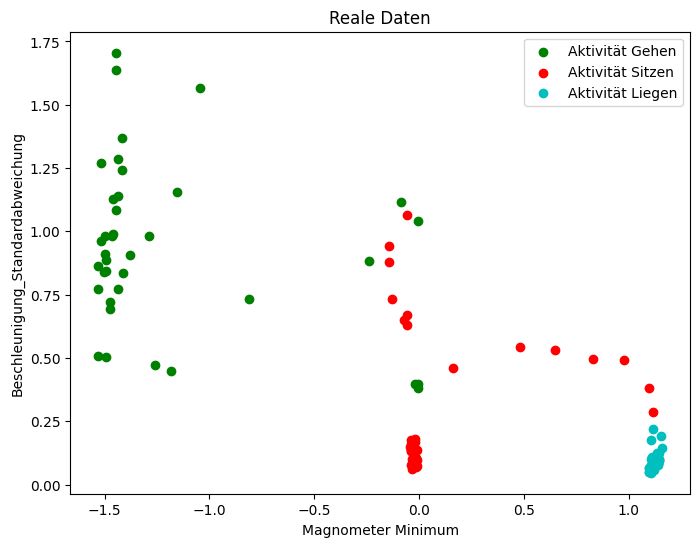

In [ ]:
# Visualisierung der Cluster
plt.figure(figsize=(8, 6))

# Erstelle eine Liste von Farben für die Cluster
farben = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Durchlaufen der Cluster und erstellen der Scatter-Plots für jeden Cluster
i=1
for label in ['Gehen','Sitzen','Liegen']:
    cluster_data = feature_df[feature_df['Label'] == label]
    plt.scatter(cluster_data['Magnometer_Minimum'], cluster_data['Beschleunigung_Standardabweichung'], c=farben[i], label=f'Aktivität {label}')
    i+=1

# Beschriftung des Diagramms
plt.xlabel('Magnometer Minimum')
plt.ylabel('Beschleunigung_Standardabweichung')
plt.title('Reale Daten')
plt.legend()

# Anzeigen des Scatter-Plots
plt.show()
